In [1]:
# Numerical and Data Manipulation
import numpy as np
import pandas as pd
import itertools

# Database Querying
import yfinance as yf

# Model Setup and Manipulation
from arch import arch_model
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Plotting
import matplotlib.pyplot as plt

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression

In [56]:
def plot(data1: pd.DataFrame, title: str, data2: pd.DataFrame=None
         , data3: pd.DataFrame=None, label: str=None, label1: str=None, label2: str=None):
    '''
    Must have one data and its title
    Parameteres:
        data1: pandas Data Frame
        title: string
    '''
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    
    if isinstance(data1, (pd.Series, pd.DataFrame)):
        plt.plot(data1, label=label)
        ylabel = data1.columns[0] if isinstance(data1, pd.DataFrame) else data1.name
        xlabel = data1.index.name
    else:
        plt.plot(data1, label=label)
        ylabel = 'Value'
        xlabel = 'Index'
    
    if data2 is not None:
        if isinstance(data2, (pd.Series, pd.DataFrame)):
            plt.plot(data2, linestyle='--', label=label1)
    
    if data3 is not None:
        if instance(data3, (pd.Series, pd.DataFrame)):
            plt.plot(data3, linestyle='_', label=label2)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel if xlabel is not None else 'Index')
    plt.title(title)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [4]:
def plot_histogram(data: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 6))
    plt.plot(data1, label=label)
    ylabel = data1.columns[0] if isinstance(data1, pd.DataFrame) else data1.name
    xlabel = data1.index.name

In [6]:
def get_data(ticker: str, time_frame: int):
    '''
    Returns pandas DataFrame of given
    Parameteres:
        ticker: string, company Ticker in Yahoo Finance
        time_frame = integer, fraction of a year
    '''
    df = yf.download(ticker,
                     start=dt.datetime.today() - dt.timedelta(days=time_frame*365), 
                     end=dt.datetime.today())['Close']
    df = pd.DataFrame(df)
    return pd.DataFrame(df)

In [7]:
# Differencing
def diff(data: pd.DataFrame, times: int):
    '''
    Pass in data and times of differencing to difference the data
    Parameteres:
        data: pandas Data Frame
        times: integer
    '''
    return list(itertools.chain(*(np.array((data - data.shift(-times).dropna()).dropna()).tolist())))

# pd.DataFrame((data - data.shift(-times).dropna()))

In [8]:
# Volatility given time period
def volatility(data, time_frame):
    '''
    Returns volatility of given time frame
    Parameteres:
        data: Pandas DataFrame
        time_frame: integer
    '''
    vol_list = []
    for i in range(len(data) + 1):
        for j in range(len(data) + 1):
            if j - i == time_frame:
                vol_list.append(np.std(np.array(((np.log(data) - np.log(data).shift(1)).dropna())[i:j]).tolist()))
                break
    return vol_list

In [32]:
# Annual Volatility given volatility of given period
def annual_volatility(data: pd.DataFrame, ticker: str):
    '''
    Calculate annual volatilty of a certain product or instrument or index
    Parameteres:
        data: pandas DataFrame
        ticker: string, company Ticker in Yahoo Finance
    '''
    return np.std(np.array((np.log(data) - np.log(data.shift(1))).dropna()).tolist()) * np.sqrt(252)

In [34]:
# Moving Average with self defined days
def ma(data: pd.DataFrame, days: int):
    '''
    Calculate n days moving average of given data with given days
    Parameteres:
        data: pandas DataFrame
        days: integer
    '''
    data_list = pd.DataFrame(list(itertools.chain(*data.values.tolist())))
    data_list_moved = pd.DataFrame(list(itertools.chain(*data.shift(days).values.tolist())))
    ma = ((data_list + data_list_moved) / 2).dropna()
    ma.index = data.index[days:]
    ma.columns = ['Close']
    return ma

In [33]:
# Returns starting date and ending date
def date(time_frame: int):
    '''
    Retrieve the time frame we want to analyze, for further use in the whole project
    Parameters:
        time_frame: integer
    '''
    today = dt.date.today()
    n_years = (today - dt.timedelta(days=time_frame*365)).strftime('%Y-%m-%d')
    return today, n_years

# Identify Probability Distribution

Data Preprocess

In [42]:
tgt = get_data('TGT', 3)
# print(tgt)

tgt_list = list(itertools.chain(*np.array(get_data('TGT', 3))))
# print(tgt_list)

tgt_lag1 = list(itertools.chain(*np.array(tgt.shift(1))))

# Return array
ret_array = np.array(tgt_list) / np.array(tgt_lag1) - 1
ret_array = ret_array[~np.isnan(ret_array)]

# Return list
ret_list = ret_array[~np.isnan(ret_array)].tolist()

# Return DataFrame
ret = pd.DataFrame(ret_list)
ret.columns = ['Return']
ret.index = tgt.index[1:]

print(ret_array)
# print(ret_list)
print(ret)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

[ 8.55573897e-03  4.16077062e-03  0.00000000e+00  1.47236448e-02
 -1.94261609e-03  7.46774531e-03 -2.75997395e-03 -7.03751564e-03
 -1.19445670e-04  1.42960006e-02  5.26081051e-03  3.74935371e-03
  1.56413714e-02 -6.51317582e-04 -9.58368527e-03 -3.63822564e-03
  1.64710979e-02 -2.33133020e-03 -1.45948965e-02  1.92816909e-02
 -6.36923474e-03  3.33932799e-03 -5.01146744e-03  8.92001752e-03
  6.32599230e-03 -4.01407782e-03 -4.29643299e-03 -1.29829056e-03
  6.15578993e-03 -3.23009698e-02 -2.77635666e-02 -8.76483623e-03
  3.25577202e-02 -3.43328784e-03 -7.44467941e-03  1.99481353e-03
 -8.71983769e-03  8.83619682e-04  7.22401235e-04 -9.54445331e-03
 -2.46983813e-03 -2.27299415e-03 -6.10227417e-03 -6.50811000e-03
  1.39667080e-02 -2.72235247e-03 -3.66692123e-03 -5.88855493e-03
 -3.53764125e-03  7.84343566e-03  1.15097795e-02 -1.13382783e-03
 -1.83646119e-02 -3.42777663e-03  1.90628950e-03  3.72252091e-03
 -5.06859413e-03 -1.18455955e-02 -2.15441334e-02  1.03238675e-02
 -3.00190869e-02 -1.52994

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


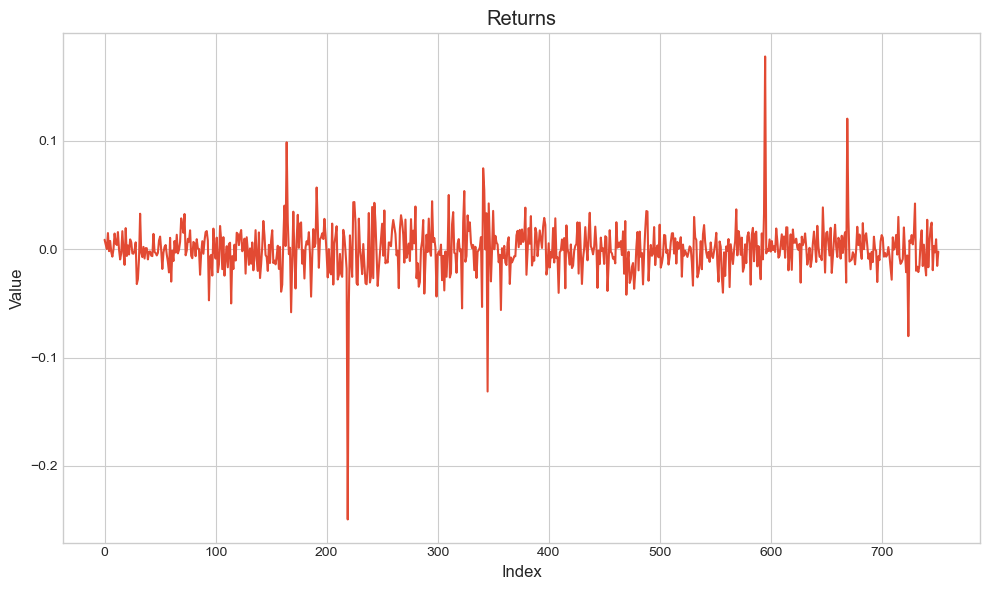

In [57]:
plot(ret_array, title='Returns')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  3.,  2.,  1.,  6.,  7., 14., 18.,
        24., 25., 31., 54., 74., 88., 83., 80., 61., 49., 41., 23., 22.,
        11., 12.,  5.,  6.,  0.,  2.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.24930323, -0.24503476, -0.2407663 , -0.23649783, -0.23222937,
        -0.22796091, -0.22369244, -0.21942398, -0.21515552, -0.21088705,
        -0.20661859, -0.20235012, -0.19808166, -0.1938132 , -0.18954473,
        -0.18527627, -0.18100781, -0.17673934, -0.17247088, -0.16820241,
        -0.16393395, -0.15966549, -0.15539702, -0.15112856, -0.1468601 ,
        -0.14259163, -0.13832317, -0.1340547 , -0.12978624, -0.125517

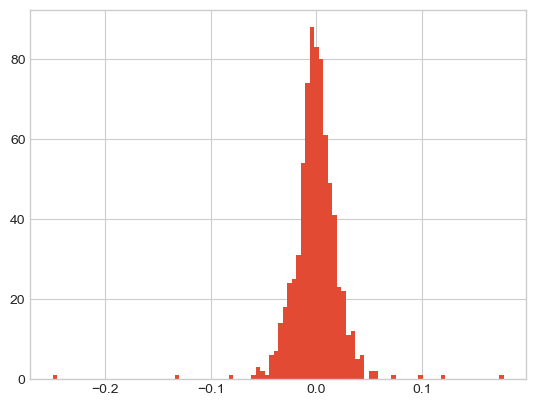

In [58]:
plt.hist(ret_array, bins=100)

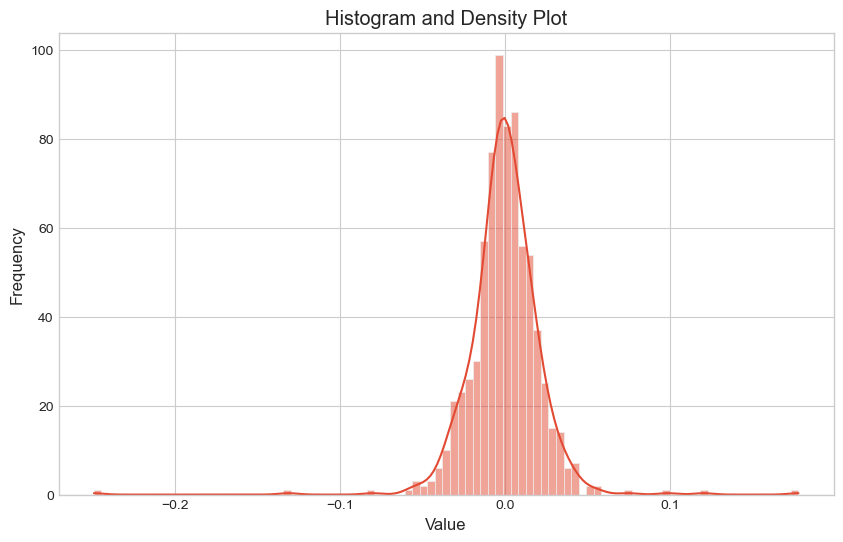

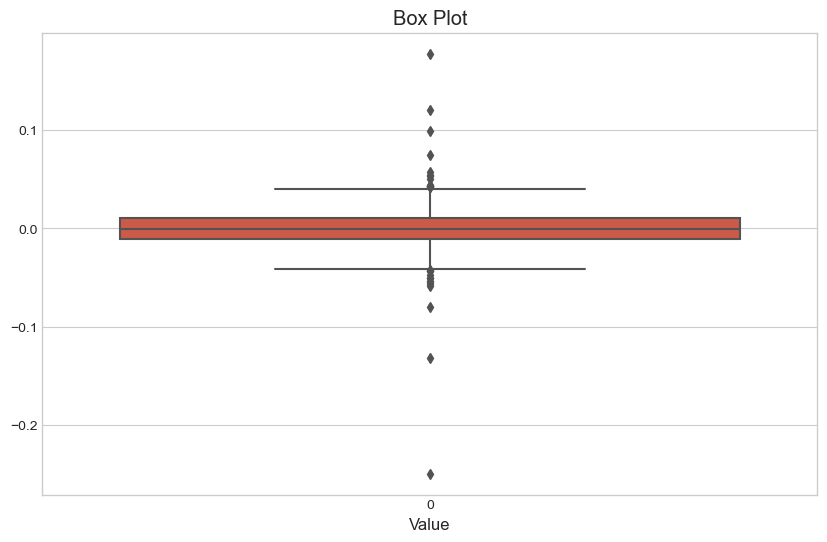

Shapiro-Wilk Test Statistic: 0.8331283926963806
p-value: 2.6497945658450672e-27
Data does not follow a normal distribution (reject H0)
K-S Test Statistic: 0.4727743891047993
p-value: 8.442386467338642e-155
Data does not follow a normal distribution (reject H0)


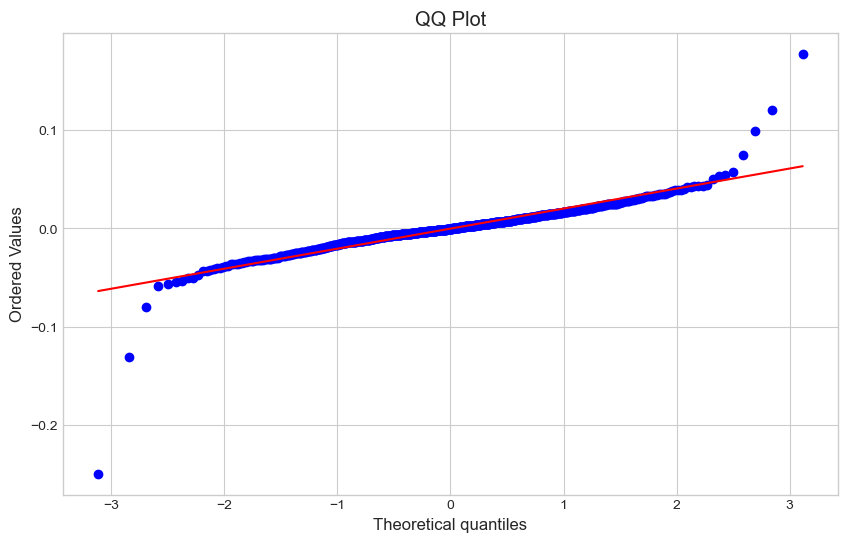

norm:
  Parameters: (-0.00043964473684025916, 0.0223564854014074)
  KS Test Statistic: 0.08778238245568754
  p-value: 1.7185585715544353e-05

expon:
  Parameters: (-0.24930322590705378, 0.2488635811702135)
  KS Test Statistic: 0.5495829225717069
  p-value: 8.589946087605383e-214

gamma:
  Parameters: (0.5749654275926205, -0.24930322590705384, 1.3485538127929306)
  KS Test Statistic: 0.5571521613278442
  p-value: 2.8754002325767955e-220



In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, norm, expon, gamma, probplot

data = ret_array

# Visual Inspection
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.title('Histogram and Density Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.title('Box Plot')
plt.xlabel('Value')
plt.show()

# Shapiro-Wilk Test
stat, p_value = shapiro(data)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p_value)

if p_value > 0.05:
    print('Data follows a normal distribution (fail to reject H0)')
else:
    print('Data does not follow a normal distribution (reject H0)')

# Kolmogorov-Smirnov Test
stat, p_value = kstest(data, 'norm')
print('K-S Test Statistic:', stat)
print('p-value:', p_value)

if p_value > 0.05:
    print('Data follows a normal distribution (fail to reject H0)')
else:
    print('Data does not follow a normal distribution (reject H0)')

# QQ Plot
plt.figure(figsize=(10, 6))
probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# Automated Distribution Fitting
distributions = [norm, expon, gamma]
results = {}

for distribution in distributions:
    params = distribution.fit(data)
    kstest_stat, kstest_p_value = kstest(data, distribution.cdf, args=params)
    results[distribution.name] = {'params': params, 'ks_stat': kstest_stat, 'p_value': kstest_p_value}

# Print results
for dist_name, result in results.items():
    print(f"{dist_name}:")
    print(f"  Parameters: {result['params']}")
    print(f"  KS Test Statistic: {result['ks_stat']}")
    print(f"  p-value: {result['p_value']}")
    print()

In [ ]:
tell stories from data

In [40]:
tgt.index

DatetimeIndex(['2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-19',
               ...
               '2024-06-18', '2024-06-20', '2024-06-21', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-07-01', '2024-07-02'],
              dtype='datetime64[ns]', name='Date', length=753, freq=None)

In [ ]:
plot(ret_list, 'Return on Target.inc')

# Call Option Strike Price = $145.00

In [ ]:
tgt_call = get_data('TGT240705C00145000', 3)
print(tgt_call)

tgt_call_list = list(itertools.chain(*np.array(get_data('TGT240705C00145000', 3))))
print(tgt_call_list)

In [ ]:
plot(tgt_call, title='Targer Call Option')